### Oasis Infobyte

#### Task 4: EMAIL SPAM DETECTION WITH MACHINE LEARNING

##### PROBLEM STATEMENT

##### We've all been the recipient of spam mats before Spam mail, or junk mail is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content
##### In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classity emails into spam and non-spam. Let get

#### Import Libraries

In [96]:
simport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


##### Loading the dataset

In [97]:
data=pd.read_csv('spam.csv',encoding='ISO-8859-1')

#### head of dataset

In [98]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


##### drop unnecessary columns

In [99]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

##### rename column names

In [100]:
data.columns=['category','message']

#### head of dataset

In [101]:
data.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##### summary of the data

In [102]:
data.describe()

,category,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### keys

In [103]:
data.keys()

Index(['category', 'message'], dtype='object')

### shape of dataset

In [104]:
print("shape of dataset :",data.shape)

shape of dataset : (5572, 2)


### How many mising values are present?

In [105]:
data.isnull().any()

category    False
message     False
dtype: bool

### Information about all variables of the dataset

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   object
 1   message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


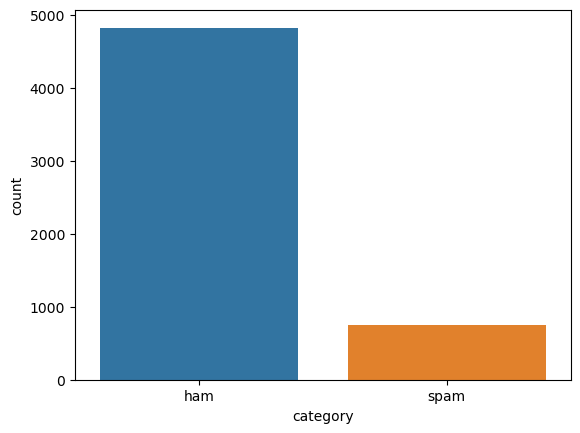

In [109]:
sns.countplot(x='category',data=data)
plt.show()

In [112]:
data.drop_duplicates(inplace=True)
data=data.fillna(' ')

##### split data into train and test

In [111]:
train,test=train_test_split(data,test_size=0.30)
train_x=data['message'].values
train_y=data['category'].values

test_x=data['message'].values
test_y=data['category'].values

In [113]:
cv=CountVectorizer()
train_x=cv.fit_transform(train_x)
test_x=cv.transform(test_x)

#### train model using vector method

In [115]:
model=SVC()
model.fit(train_x,train_y)
predct=model.predict(test_x)
metrics.accuracy_score(predct,test_y)

0.995550396595086

##### accuracy of testing and test dataset

In [117]:
train_accuracy=model.score(train_x,train_y)
test_accuracy=model.score(test_x,test_y)
print(train_accuracy)
print(test_accuracy)

0.995550396595086
0.995550396595086


##### plot the result

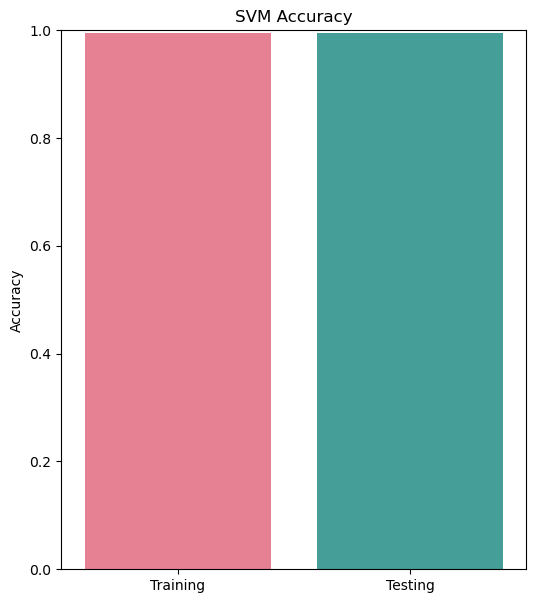

In [119]:
plt.figure(figsize=(6,7))
sns.barplot(x=['Training','Testing'],y=[train_accuracy,test_accuracy],palette='husl')
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.title('SVM Accuracy')
plt.show()

##### train model using RandomForestClassifier

In [123]:
model=RandomForestClassifier()
model.fit(train_x,train_y)
predct=model.predict(test_x)
metrics.accuracy_score(predct,test_y)


1.0

##### accuracy of train and test dataset

In [125]:
train_accuracy=model.score(train_x,train_y)
test_accuracy=model.score(test_x,test_y)
print(train_accuracy)
print(test_accuracy)

1.0
1.0


##### plot the result

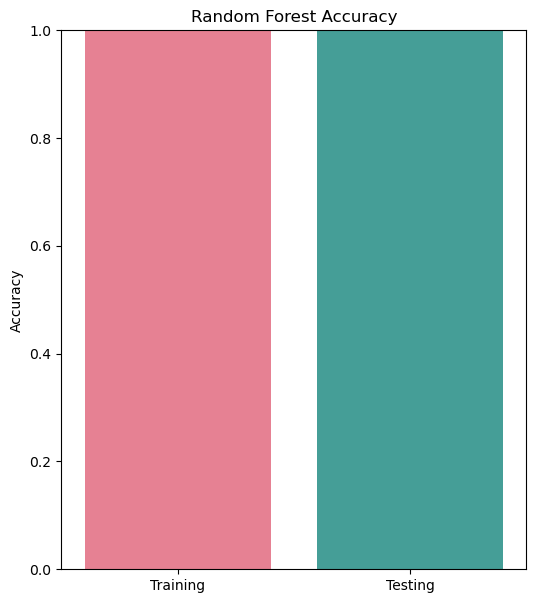

In [127]:
plt.figure(figsize=(6,7))
sns.barplot(x=['Training','Testing'],y=[train_accuracy,test_accuracy],palette='husl')
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy')
plt.show()